In [ ]:
import numpy as np
import keras
from sklearn.model_selection import train_test_split
import tensorflow.keras
import matplotlib.pyplot as plt
import json
DATA_PATH = "data.json"

In [ ]:
with open("data.json", "r") as file:
    data = json.load(file)
X = np.array(data["mfcc"])
y = np.array(data["labels"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)
# inp = (X_train.shape[1], X_train.shape[2]) 
model = keras.Sequential()
model.add(keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(keras.layers.LSTM(64))
model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.LSTM(32))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.01)
# model.compile(optimizer=opt,loss='sparse_categorical_crossentropy')
# model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=30, epochs=20)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 130, 64)           19968     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
214/214 [==============================] - 15s 60ms/step - loss: 1.9755 - accuracy: 0.3024 - val_loss: 1.

In [ ]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
# _, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Training accuracy: ",train_acc)
print("Testing accuarcy: ",test_acc)
# print("val_loss = {:.3f} and val_acc = {:.3f}".format(score[0], score[1]))

Training accuracy:  0.8650718927383423
Testing accuarcy:  0.7540000081062317


In [ ]:
print(X_test.shape)
predictions = model.predict(X_test)

(2000, 130, 13)


In [ ]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(6396, 130, 13) (2000, 130, 13) (6396,) (2000,)


In [ ]:
test_pred = np.argmax(predictions, axis=1)

In [ ]:
import sklearn
cm = sklearn.metrics.confusion_matrix(y_test, test_pred)

In [ ]:
cm

array([[161,   0,   3,   0,   5,   0,   4,   2,   3,   2],
       [  0, 190,   1,   0,   1,   0,   7,   5,   3,   0],
       [  8,   4, 149,   2,  10,   0,   7,  18,   2,   1],
       [  0,  13,   7, 152,   1,   0,   9,   7,  15,   7],
       [  6,   0,   4,   2, 163,   1,   6,  15,   5,   3],
       [  0,   0,   0,   1,   0, 184,   3,   0,   2,   5],
       [  9,  18,  19,  14,  11,   1,  90,   8,  13,   7],
       [  7,  13,   9,   5,  19,   0,   3, 153,   4,   0],
       [  6,   0,   7,  16,  11,   1,  18,   4, 130,  16],
       [  2,   1,   1,   2,   4,  20,   7,   2,  14, 136]])

In [ ]:
confusion_df = pd.DataFrame(cm)
confusion_df

,0,1,2,3,4,5,6,7,8,9
0,161,0,3,0,5,0,4,2,3,2
1,0,190,1,0,1,0,7,5,3,0
2,8,4,149,2,10,0,7,18,2,1
3,0,13,7,152,1,0,9,7,15,7
4,6,0,4,2,163,1,6,15,5,3
5,0,0,0,1,0,184,3,0,2,5
6,9,18,19,14,11,1,90,8,13,7
7,7,13,9,5,19,0,3,153,4,0
8,6,0,7,16,11,1,18,4,130,16
9,2,1,1,2,4,20,7,2,14,136


In [ ]:
labels_dict = {
    0: 'jazz',
    1: 'reggae',
    2: 'rock',
    3: 'blues',
    4: 'hiphop',
    5: 'country',
    6: 'metal',
    7: 'classical',
    8: 'disco',
    9: 'pop'
}

In [ ]:
confusion_df = confusion_df.rename(columns=labels_dict)
confusion_df.index = confusion_df.columns
confusion_df

,jazz,reggae,rock,blues,hiphop,country,metal,classical,disco,pop
jazz,161,0,3,0,5,0,4,2,3,2
reggae,0,190,1,0,1,0,7,5,3,0
rock,8,4,149,2,10,0,7,18,2,1
blues,0,13,7,152,1,0,9,7,15,7
hiphop,6,0,4,2,163,1,6,15,5,3
country,0,0,0,1,0,184,3,0,2,5
metal,9,18,19,14,11,1,90,8,13,7
classical,7,13,9,5,19,0,3,153,4,0
disco,6,0,7,16,11,1,18,4,130,16
pop,2,1,1,2,4,20,7,2,14,136


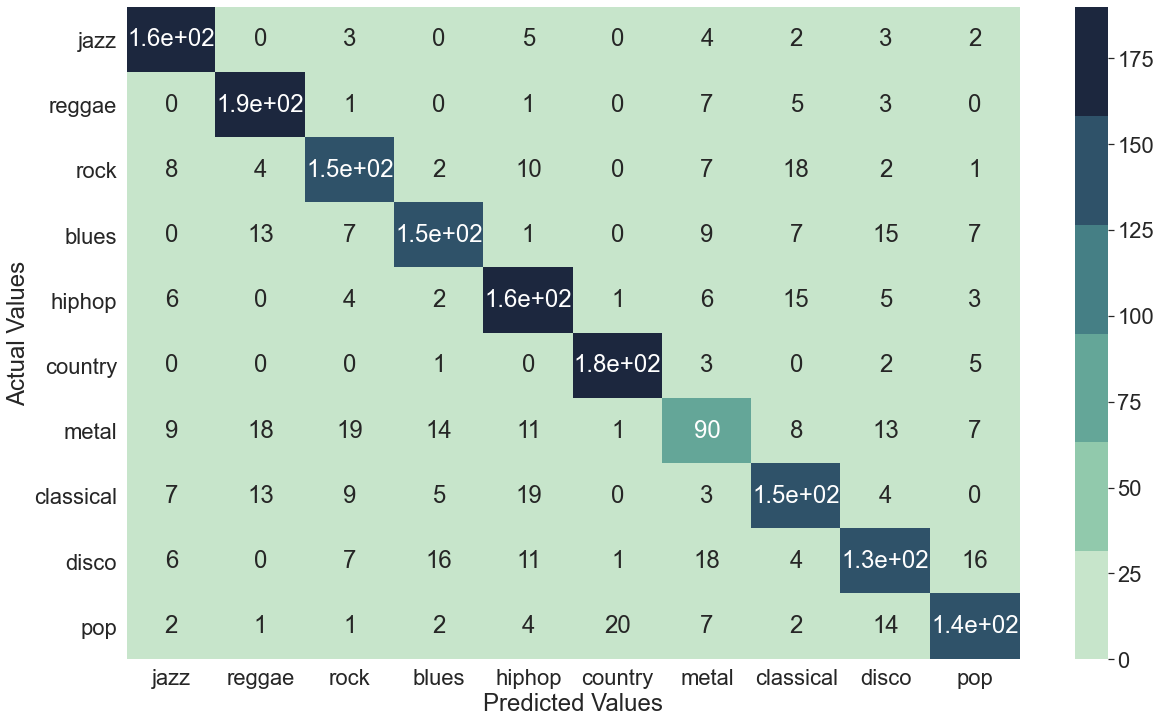

In [ ]:
plt.figure(figsize= (20,12))
sns.set(font_scale = 2);
ax = sns.heatmap(confusion_df, annot=True, cmap=sns.cubehelix_palette(rot=-.4));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

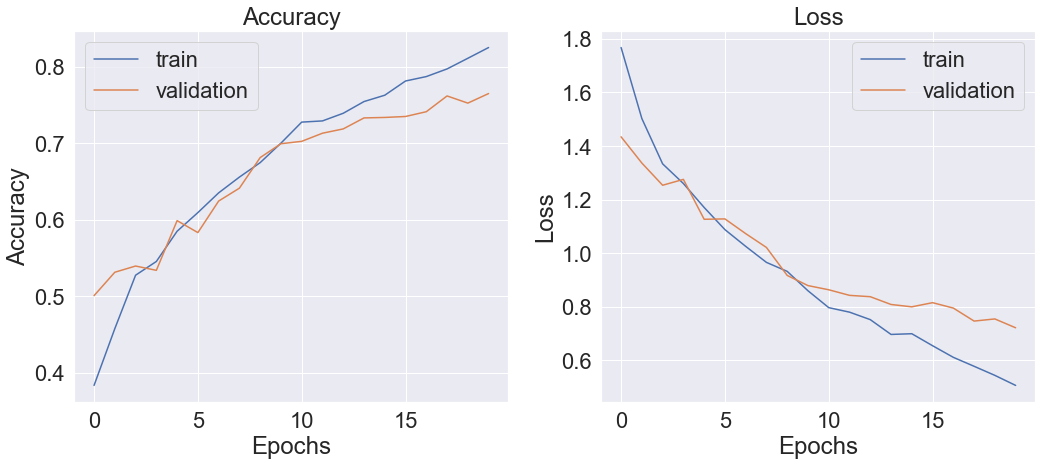

In [ ]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()÷
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')

Normalized confusion matrix


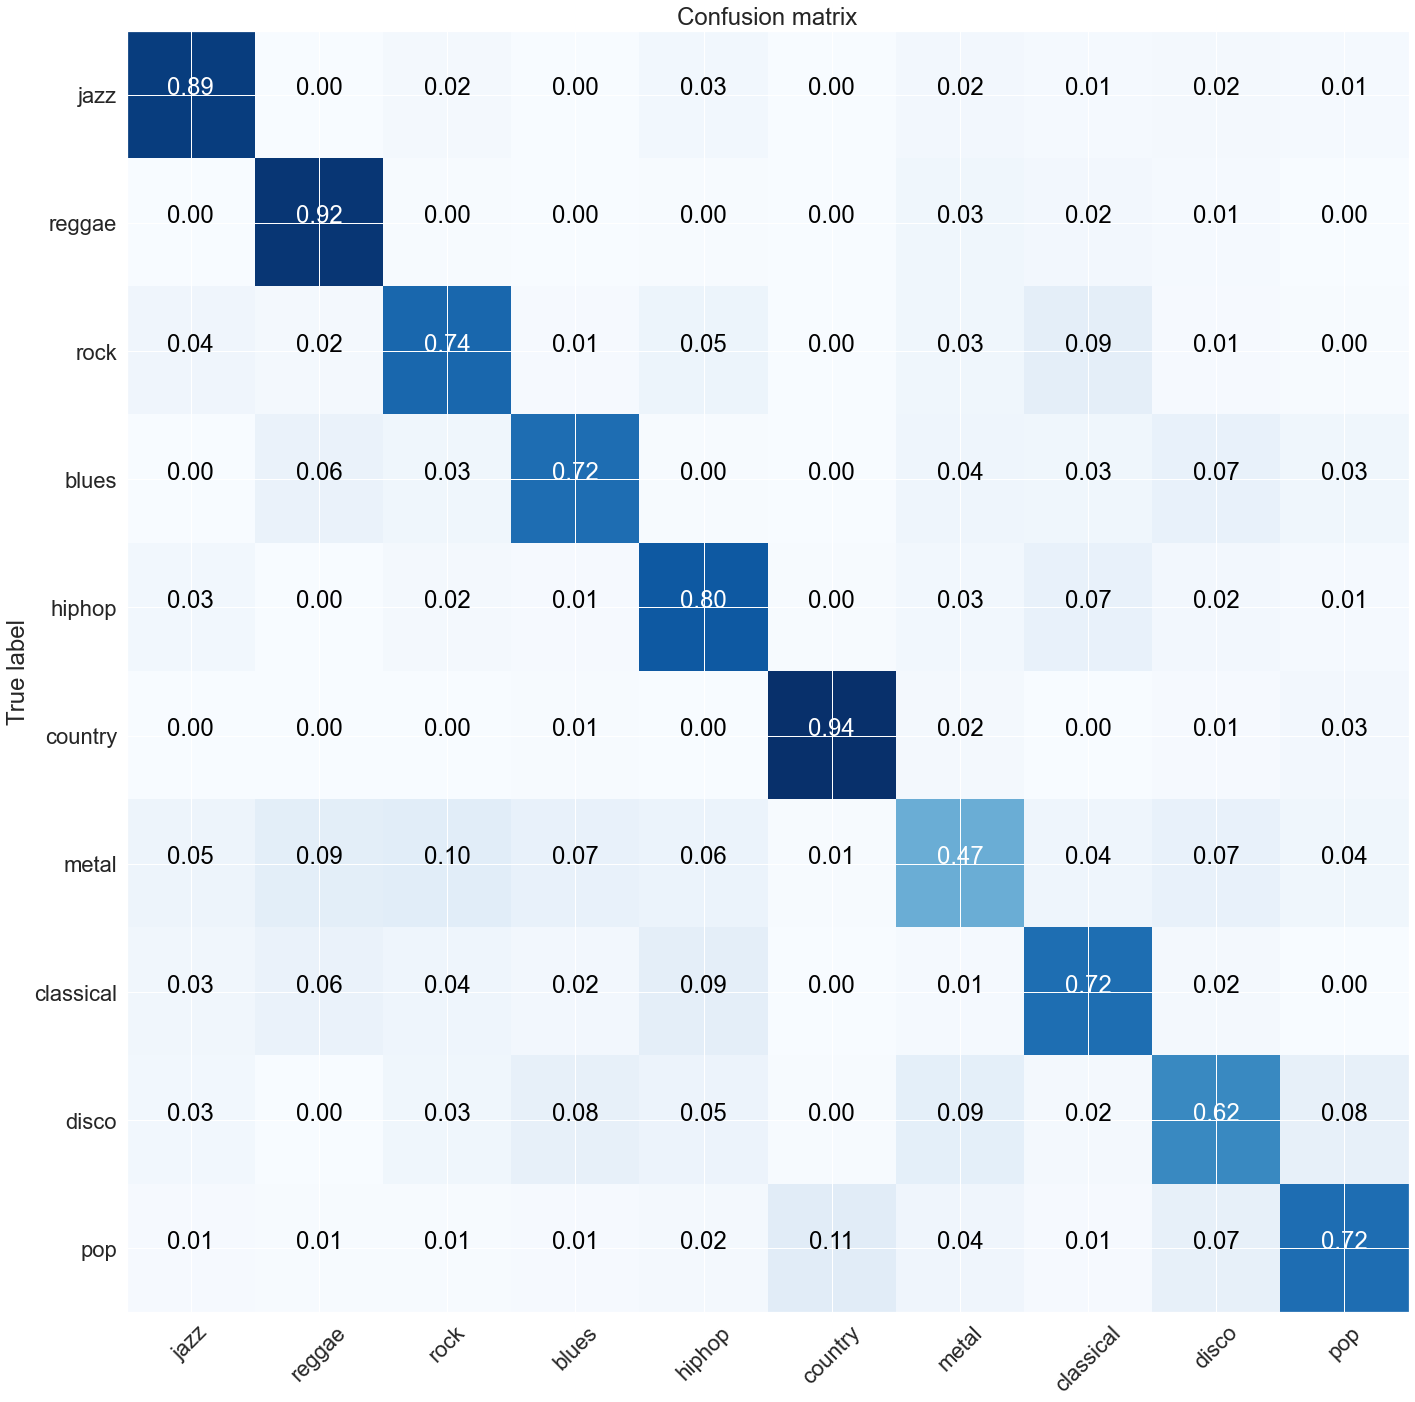

In [ ]:
import collections
# imports the collections module into the current namespace, so you could work with this import like this:
import itertools
import collections
orderedDict = collections.OrderedDict()


from collections import OrderedDict

label_dict = {
        'jazz': 0,
        'reggae': 1,
        'rock': 2,
        'blues': 3,
        'hiphop': 4,
        'country': 5,
        'metal': 6,
        'classical': 7,
        'disco': 8,
        'pop': 9
    }
keys = OrderedDict(sorted(label_dict.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(20,20))
plot_confusion_matrix(cm, keys, normalize=True)